In [ ]:
###############################################
#########    Deep Learning            #########
#########    Pedram MohajerAnsari     #########
#########    Homework 1 - Part 1      #########
###############################################

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!cd drive/MyDrive/Deep_Learning_HW1/P1

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
TORCH_CUDA_ARCH_LIST="8.6"

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn
import torchvision.transforms as transformtransforms

from torchvision import models
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToPILImage
from tqdm import tqdm

import copy
import math
import matplotlib.pyplot as plt
import numpy as np



In [3]:
Project_PATH = os.path.dirname(os.path.abspath('__file__'))
outputs_dir = Project_PATH + '/'
model_path = '/content/drive/MyDrive/Deep_Learning_HW1/P1' + '/save_models/'

In [4]:
print('---------------------------------------------------------')
device_default = torch.cuda.current_device()
torch.cuda.device(device_default)
print('torch.cuda.get_device_name(device_default) : ', torch.cuda.get_device_name(device_default) )
print('---------------------------------------------------------')
device = torch.device("cuda")
print('torch.cuda.get_arch_list()  : ', torch.cuda.get_arch_list())
print('---------------------------------------------------------')
print('torch.version.cuda          : ', torch.version.cuda)
print('---------------------------------------------------------')
print('torch.__version__           : ', torch.__version__)
print('---------------------------------------------------------')
print('torch.cuda.is_available()   : ', torch.cuda.is_available())
print('---------------------------------------------------------')
print('torch.cuda.device_count()   : ', torch.cuda.device_count())
print('---------------------------------------------------------')
print('torch.cuda.current_device() : ', torch.cuda.current_device())
print('---------------------------------------------------------')

---------------------------------------------------------
torch.cuda.get_device_name(device_default) :  Tesla T4
---------------------------------------------------------
torch.cuda.get_arch_list()  :  ['sm_37', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86']
---------------------------------------------------------
torch.version.cuda          :  11.6
---------------------------------------------------------
torch.__version__           :  1.13.1+cu116
---------------------------------------------------------
torch.cuda.is_available()   :  True
---------------------------------------------------------
torch.cuda.device_count()   :  1
---------------------------------------------------------
torch.cuda.current_device() :  0
---------------------------------------------------------


### Models

In [5]:
###################################################
########### 8-Layer Deep Neural Network ########### 
###################################################

class NN_8_layer(nn.Module):
    
    def __init__(self):
        super(NN_8_layer, self, ).__init__()
        self.layer1 = nn.Sequential(nn.Linear(1, 5),nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(5, 10),nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(10, 10),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(10, 10),nn.ReLU(True))
        self.layer5 = nn.Sequential(nn.Linear(10, 10),nn.ReLU(True))
        self.layer6 = nn.Sequential(nn.Linear(10, 10),nn.ReLU(True))
        self.layer7 = nn.Sequential(nn.Linear(10, 5),nn.ReLU(True))
        self.layer8 = nn.Sequential(nn.Linear(5, 1))

    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)    
        x = self.layer3(x)    
        x = self.layer4(x)    
        x = self.layer5(x)    
        x = self.layer6(x)    
        x = self.layer7(x)    
        x = self.layer8(x)    
        return x
    
device = torch.device("cuda")
Model_NN_8_layer = NN_8_layer().to(device)
summary(Model_NN_8_layer, (1,1))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 5]              10
              ReLU-2                 [-1, 1, 5]               0
            Linear-3                [-1, 1, 10]              60
              ReLU-4                [-1, 1, 10]               0
            Linear-5                [-1, 1, 10]             110
              ReLU-6                [-1, 1, 10]               0
            Linear-7                [-1, 1, 10]             110
              ReLU-8                [-1, 1, 10]               0
            Linear-9                [-1, 1, 10]             110
             ReLU-10                [-1, 1, 10]               0
           Linear-11                [-1, 1, 10]             110
             ReLU-12                [-1, 1, 10]               0
           Linear-13                 [-1, 1, 5]              55
             ReLU-14                 [-

In [6]:
###################################################
########### 5-Layer Deep Neural Network ########### 
###################################################

class NN_5_layer(nn.Module):
    def __init__(self):
        super(NN_5_layer, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(1, 10),nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(10, 18),nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(18, 15),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(15, 4),nn.ReLU(True))
        self.layer5 = nn.Sequential(nn.Linear(4, 1))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)    
        x = self.layer3(x)    
        x = self.layer4(x)    
        x = self.layer5(x)      
        return x
    
device = torch.device("cuda")
Model_NN_5_layer = NN_5_layer().to(device)
summary(Model_NN_5_layer, (1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]              20
              ReLU-2                [-1, 1, 10]               0
            Linear-3                [-1, 1, 18]             198
              ReLU-4                [-1, 1, 18]               0
            Linear-5                [-1, 1, 15]             285
              ReLU-6                [-1, 1, 15]               0
            Linear-7                 [-1, 1, 4]              64
              ReLU-8                 [-1, 1, 4]               0
            Linear-9                 [-1, 1, 1]               5
Total params: 572
Trainable params: 572
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
---------------------------------------------------

In [7]:
###################################################
########### 2-Layer Deep Neural Network ########### 
###################################################

class NN_2_layer(nn.Module):
    def __init__(self):
        super(NN_2_layer, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(1, 190),nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(190, 1))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)         
        return x
    
device = torch.device("cuda")
Model_NN_2_layer = NN_2_layer().to(device)
summary(Model_NN_2_layer, (1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 190]             380
              ReLU-2               [-1, 1, 190]               0
            Linear-3                 [-1, 1, 1]             191
Total params: 571
Trainable params: 571
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [12]:
pwd

'/content'

## HW1-1 Simulate a Function

### sin(5*np.pi*x)/(5*np.pi*x)

<Figure size 1080x720 with 0 Axes>

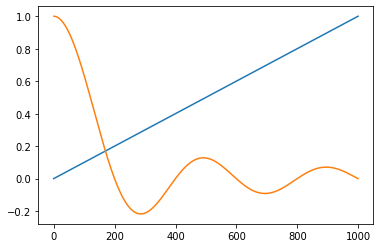

In [26]:
############################################
X = torch.linspace(0,1,1000).unsqueeze(1)
y = ( torch.sin(5*np.pi*X) ) / ( (5*np.pi*X) )
############################################
plt.figure(figsize=(15,10))
plt.figure()
plt.plot(X)
plt.plot(y)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img0.png')
plt.show()

### sgn(torch.sin(5*np.pi*x), 0)

<Figure size 1080x720 with 0 Axes>

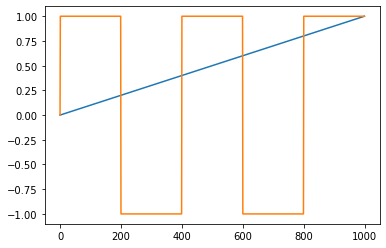

In [30]:
############################################
def sgn(x, y):

    h, w = list(x.size())
    Y  = torch.rand(h,w)

    for i in range(h):
        if(x[i] > y): Y[i] = 1
        if(x[i] < y): Y[i] = -1
        if(x[i] == y): Y[i] = 0
        
    return Y

############################################

X = torch.linspace(0,1,1000).unsqueeze(1)
y = sgn(torch.sin(5*np.pi*X), 0)

############################################

plt.figure(figsize=(15,10))
plt.figure()
plt.plot(X)
plt.plot(y)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img1.png')
plt.show()

### HW1-1 Simulate a Function

In [31]:
###################################################
###########       Generate Data         ########### 
###################################################

x = torch.linspace(0,1,1000).unsqueeze(1)
y = torch.sin(5*np.pi*x)/(5*np.pi*x)

y[0] = y[1]
func_sin = y

y = sgn(torch.sin(5*np.pi*x), 0)
func_sgn = y


###################################################
###########        Train Function       ########### 
###################################################

def train(function,
          model_name,
          Epochs = 20000,
          Batch  = 1000,
          Data_workers = 0,
          LR = 0.0005):

    ###########        Create Model     ###########
    
    torch.cuda.is_available()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
    Model = model_name().to(device)

    x = torch.linspace(0,1,1000).unsqueeze(1)
    x = x.to(device)
    y = function.to(device)

    ###########        Loss Function   ########### 
    ###########        optimizer       ########### 

    criterion = nn.MSELoss()
    optimizer = optim.Adam(Model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.8)

    ###########        Training       ########### 

    trainloss_list = []
    lr_list = []

    for epoch in range(Epochs):

        Model.train()
        train_loss = 0.0
        y_pred = Model(x)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss = loss.item()
        trainloss_list.append(train_loss)
        lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        
        if epoch >= Epochs//2:
            scheduler.step()

        if epoch % (Epochs//10) == 0:
            print('{}/{}, loss: {}'.format(epoch,Epochs,train_loss))
            

    ###########        Return       ###########     
    return [Model,trainloss_list,lr_list]

In [32]:
##################################################################
[Model_1_sin, trainloss_1_sin, lr_1_sin] = train(func_sin, NN_8_layer, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
##################################################################
[Model_2_sin, trainloss_2_sin, lr_2_sin] = train(func_sin, NN_5_layer, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
##################################################################
[Model_3_sin, trainloss_3_sin, lr_3_sin] = train(func_sin, NN_2_layer, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
##################################################################

0/5000, loss: 0.13734284043312073
500/5000, loss: 0.00020606066391337663
1000/5000, loss: 8.02122667664662e-05
1500/5000, loss: 8.354098099516705e-05
2000/5000, loss: 7.55629880586639e-05
2500/5000, loss: 8.210428495658562e-05
3000/5000, loss: 6.0703361668856815e-05
3500/5000, loss: 6.0459511587396264e-05
4000/5000, loss: 5.8129131502937526e-05
4500/5000, loss: 5.777101614512503e-05
0/5000, loss: 0.09640169143676758
500/5000, loss: 0.00788826122879982
1000/5000, loss: 0.00788826122879982
1500/5000, loss: 0.00788826122879982
2000/5000, loss: 0.007449263706803322
2500/5000, loss: 0.0074486811645329
3000/5000, loss: 0.0074483309872448444
3500/5000, loss: 0.007448220159858465
4000/5000, loss: 0.007448179181665182
4500/5000, loss: 0.007448162417858839
0/5000, loss: 0.11484737694263458
500/5000, loss: 0.0008298547472804785
1000/5000, loss: 0.0006330434116534889
1500/5000, loss: 0.0005268487730063498
2000/5000, loss: 0.0004260845307726413
2500/5000, loss: 0.0003417041152715683
3000/5000, loss

Model_1_func_sin loss: 5.776052057626657e-05
Model_2_func_sin loss: 0.007448156364262104
Model_3_func_sin loss: 0.00025676540099084377


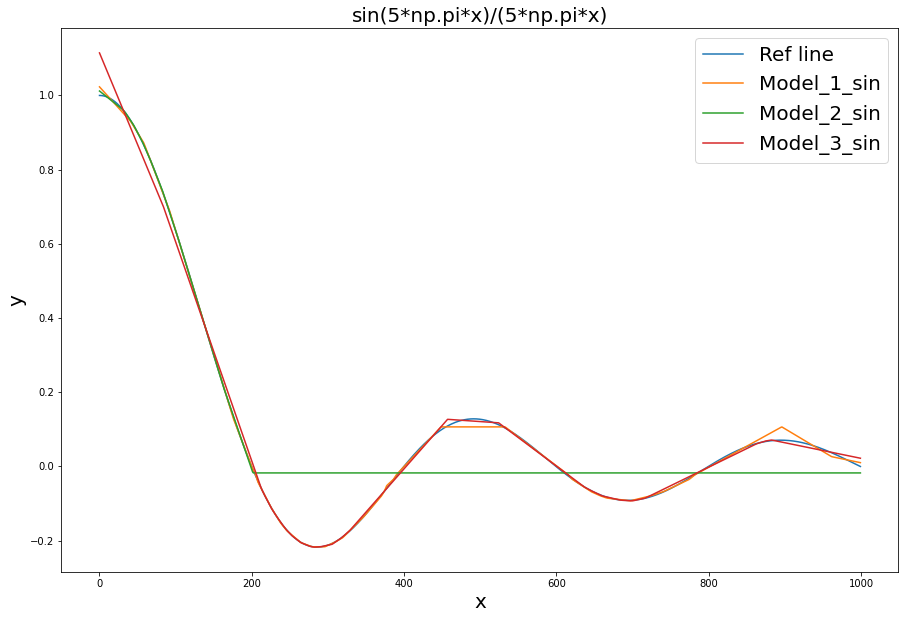

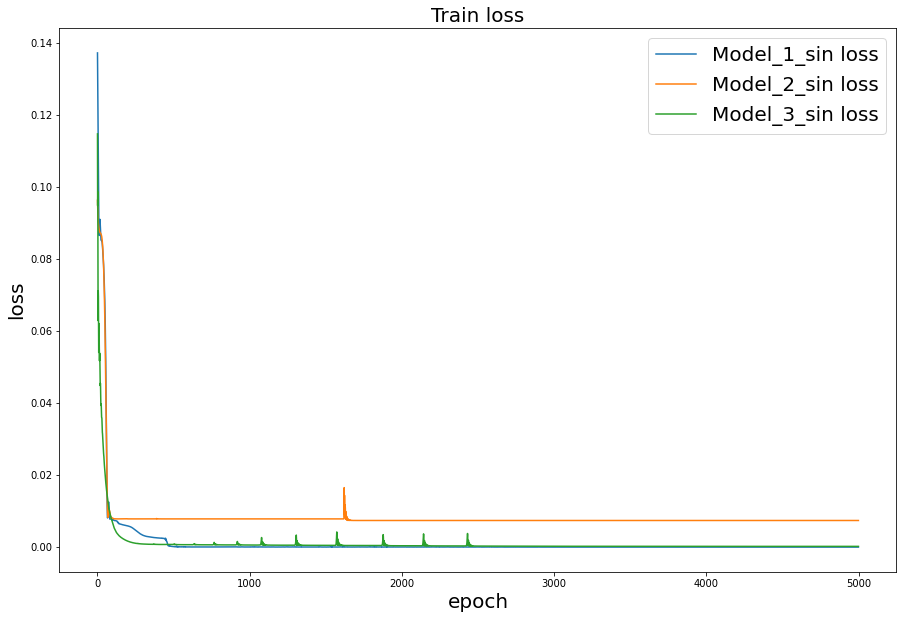

In [33]:
torch.cuda.is_available()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
x = torch.linspace(0,1,1000).unsqueeze(1)
x = x.to(device)
y = func_sin.to(device)
criterion = nn.MSELoss()

Model_1_sin.eval()
Model_2_sin.eval()
Model_3_sin.eval()

with torch.no_grad():
    y_pred_1_sin = Model_1_sin(x)
    y_pred_2_sin = Model_2_sin(x)
    y_pred_3_sin = Model_3_sin(x)
    testloss_1_sin = criterion(y_pred_1_sin, y)
    testloss_2_sin = criterion(y_pred_2_sin, y)
    testloss_3_sin = criterion(y_pred_3_sin, y)
    print('Model_1_func_sin loss: {}'.format(testloss_1_sin))
    print('Model_2_func_sin loss: {}'.format(testloss_2_sin))
    print('Model_3_func_sin loss: {}'.format(testloss_3_sin))

#################

plt.figure(figsize=(15,10))
plt.plot(y.cpu().numpy(),label='Ref line')
plt.plot(y_pred_1_sin.detach().cpu().numpy(),label='Model_1_sin')
plt.plot(y_pred_2_sin.detach().cpu().numpy(),label='Model_2_sin')
plt.plot(y_pred_3_sin.detach().cpu().numpy(),label='Model_3_sin')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('sin(5*np.pi*x)/(5*np.pi*x)',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img2.png')
plt.show()

#################

plt.figure(figsize=(15,10))
plt.plot(trainloss_1_sin, label='Model_1_sin loss')
plt.plot(trainloss_2_sin, label='Model_2_sin loss')
plt.plot(trainloss_3_sin, label='Model_3_sin loss')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.title('Train loss',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img3.png')
plt.show()

In [34]:
##################################################################
[Model_1_sgn, trainloss_1_sgn, lr_1_sgn] = train(func_sgn, NN_8_layer, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
##################################################################
[Model_2_sgn, trainloss_2_sgn, lr_2_sgn] = train(func_sgn, NN_5_layer, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
##################################################################
[Model_3_sgn, trainloss_3_sgn, lr_3_sgn] = train(func_sgn, NN_2_layer, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
##################################################################

0/5000, loss: 1.0267970561981201
500/5000, loss: 0.09051358699798584
1000/5000, loss: 0.022734619677066803
1500/5000, loss: 0.02567046508193016
2000/5000, loss: 0.02630394510924816
2500/5000, loss: 0.07116569578647614
3000/5000, loss: 0.00848793052136898
3500/5000, loss: 0.007752963341772556
4000/5000, loss: 0.007499603554606438
4500/5000, loss: 0.007400020491331816
0/5000, loss: 0.973244309425354
500/5000, loss: 0.5452160835266113
1000/5000, loss: 0.5389364361763
1500/5000, loss: 0.5381969809532166
2000/5000, loss: 0.5365880131721497
2500/5000, loss: 0.5363357067108154
3000/5000, loss: 0.5348454713821411
3500/5000, loss: 0.5346043705940247
4000/5000, loss: 0.5345322489738464
4500/5000, loss: 0.5345068573951721
0/5000, loss: 1.0753906965255737
500/5000, loss: 0.6501532196998596
1000/5000, loss: 0.6501537561416626
1500/5000, loss: 0.6501613855361938
2000/5000, loss: 0.6497007012367249
2500/5000, loss: 0.6248435378074646
3000/5000, loss: 0.6009844541549683
3500/5000, loss: 0.593033730983

Model_1_func_sgn loss: 0.007360065821558237
Model_2_func_sgn loss: 0.534491777420044
Model_3_func_sgn loss: 0.5885133743286133


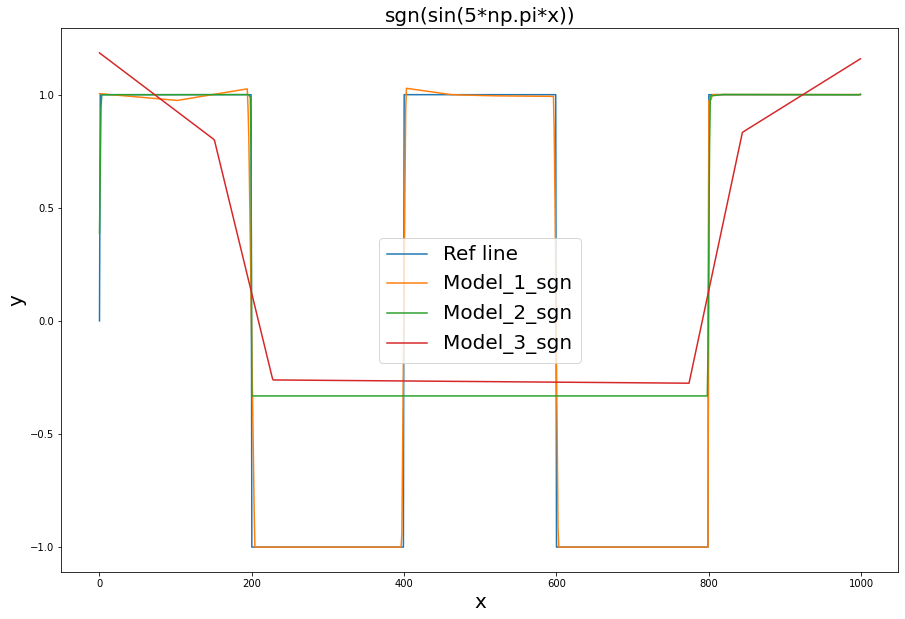

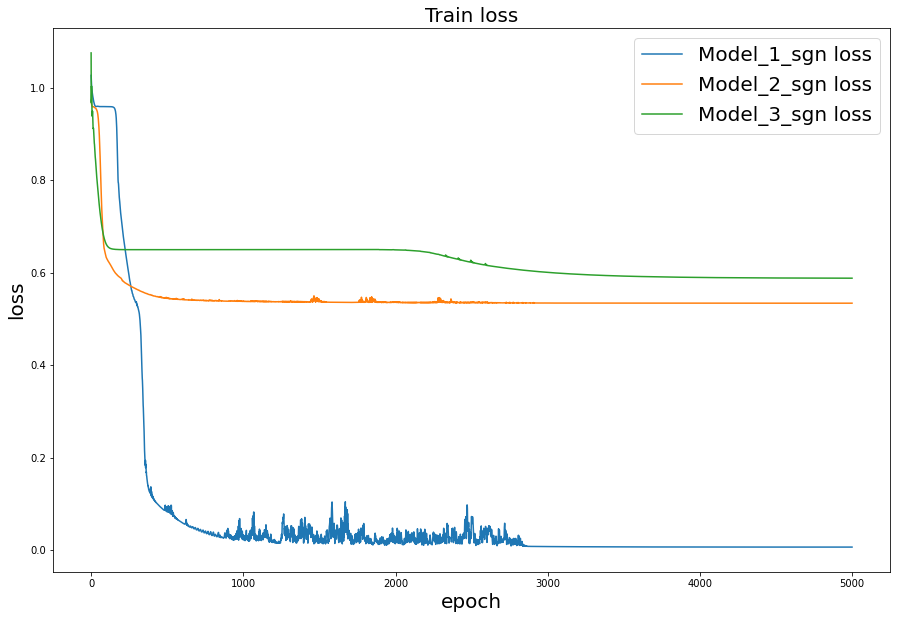

In [35]:
##################################################################
torch.cuda.is_available()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 

x = torch.linspace(0,1,1000).unsqueeze(1)
x = x.to(device)
y = func_sgn.to(device)
criterion = nn.MSELoss()

##################################################################

Model_1_sgn.eval()
Model_2_sgn.eval()
Model_3_sgn.eval()

with torch.no_grad():
    y_pred_1_sgn = Model_1_sgn(x)
    y_pred_2_sgn = Model_2_sgn(x)
    y_pred_3_sgn = Model_3_sgn(x)

    testloss_1_sgn = criterion(y_pred_1_sgn, y)
    testloss_2_sgn = criterion(y_pred_2_sgn, y)
    testloss_3_sgn = criterion(y_pred_3_sgn, y)
    
    print('Model_1_func_sgn loss: {}'.format(testloss_1_sgn))
    print('Model_2_func_sgn loss: {}'.format(testloss_2_sgn))
    print('Model_3_func_sgn loss: {}'.format(testloss_3_sgn))

#################

plt.figure(figsize=(15,10))
plt.plot(y.cpu().numpy(),label='Ref line')

plt.plot(y_pred_1_sgn.detach().cpu().numpy(),label='Model_1_sgn')
plt.plot(y_pred_2_sgn.detach().cpu().numpy(),label='Model_2_sgn')
plt.plot(y_pred_3_sgn.detach().cpu().numpy(),label='Model_3_sgn')

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

plt.title('sgn(sin(5*np.pi*x))',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img4.png')
plt.show()


#################

plt.figure(figsize=(15,10))
plt.plot(trainloss_1_sgn, label='Model_1_sgn loss')
plt.plot(trainloss_2_sgn, label='Model_2_sgn loss')
plt.plot(trainloss_3_sgn, label='Model_3_sgn loss')

plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.title('Train loss',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img5.png')
plt.show()

## HW1-1 Train on Actual Tasks

### Models

In [36]:
############################################################
########### 6-Layer Convolutional Neural Network ########### 
############################################################

class CNN_CIFAR_6_layer(nn.Module):
    def __init__(self):
        super(CNN_CIFAR_6_layer, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 10, 3),nn.ReLU(True),nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(10, 16, 3),nn.ReLU(True),nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        self.layer3 = nn.Sequential(nn.Conv2d(16, 32, 3),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(32*4*4, 128),nn.ReLU(True))
        self.layer5 = nn.Sequential(nn.Linear(128, 32),nn.ReLU(True))
        self.layer6 = nn.Sequential(nn.Linear(32, 10))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)    
        x = self.layer3(x) 
        x = x.view(x.size()[0], -1)
        x = self.layer4(x)    
        x = self.layer5(x)    
        x = self.layer6(x)    
        return x
    
device = torch.device("cuda")
Model = CNN_CIFAR_6_layer().to(device)
summary(Model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 30, 30]             280
              ReLU-2           [-1, 10, 30, 30]               0
         MaxPool2d-3           [-1, 10, 15, 15]               0
            Conv2d-4           [-1, 16, 13, 13]           1,456
              ReLU-5           [-1, 16, 13, 13]               0
         MaxPool2d-6             [-1, 16, 6, 6]               0
            Conv2d-7             [-1, 32, 4, 4]           4,640
              ReLU-8             [-1, 32, 4, 4]               0
            Linear-9                  [-1, 128]          65,664
             ReLU-10                  [-1, 128]               0
           Linear-11                   [-1, 32]           4,128
             ReLU-12                   [-1, 32]               0
           Linear-13                   [-1, 10]             330
Total params: 76,498
Trainable params: 

In [37]:
############################################################
########### 5-Layer Convolutional Neural Network ########### 
############################################################

class CNN_CIFAR_5_layer(nn.Module):
    def __init__(self):
        super(CNN_CIFAR_5_layer, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 6, 5),nn.ReLU(True),nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(6, 16, 5),nn.ReLU(True),nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        self.layer3 = nn.Sequential(nn.Linear(16*5*5, 64),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(64, 32),nn.ReLU(True))
        self.layer5 = nn.Sequential(nn.Linear(32, 10))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)  
        x = x.view(x.size()[0], -1)
        x = self.layer3(x) 
        x = self.layer4(x)    
        x = self.layer5(x)     
        return x
    
device = torch.device("cuda")
Model = CNN_CIFAR_5_layer().to(device)
summary(Model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                   [-1, 64]          25,664
              ReLU-8                   [-1, 64]               0
            Linear-9                   [-1, 32]           2,080
             ReLU-10                   [-1, 32]               0
           Linear-11                   [-1, 10]             330
Total params: 30,946
Trainable params: 30,946
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

In [38]:
############################################################
########### 4-Layer Convolutional Neural Network ########### 
############################################################

class CNN_CIFAR_4_layer(nn.Module):
    def __init__(self):
        super(CNN_CIFAR_4_layer, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 16, 5),nn.ReLU(True),nn.MaxPool2d(kernel_size=(3, 3), stride=3))
        self.layer2 = nn.Sequential(nn.Linear(16*9*9, 64),nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(64, 32),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(32, 10))
    def forward(self, x):
        x = self.layer1(x) 
        x = x.view(x.size()[0], -1)
        x = self.layer2(x)  
        x = self.layer3(x) 
        x = self.layer4(x)    
        return x
    
device = torch.device("cuda")
Model  = CNN_CIFAR_4_layer().to(device)
summary(Model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]           1,216
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3             [-1, 16, 9, 9]               0
            Linear-4                   [-1, 64]          83,008
              ReLU-5                   [-1, 64]               0
            Linear-6                   [-1, 32]           2,080
              ReLU-7                   [-1, 32]               0
            Linear-8                   [-1, 10]             330
Total params: 86,634
Trainable params: 86,634
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.20
Params size (MB): 0.33
Estimated Total Size (MB): 0.55
----------------------------------------------------------------


In [39]:
########################################
###########   Neural Network ########### 
########################################

class MODEL_MNIST(nn.Module):
    def __init__(self, in_dim, hidden_1, hidden_2, hidden_3, out_dim):
        super(MODEL_MNIST, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_dim, hidden_1),nn.BatchNorm1d(hidden_1),nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(hidden_1, hidden_2),nn.BatchNorm1d(hidden_2),nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(hidden_2, hidden_3),nn.BatchNorm1d(hidden_3),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(hidden_3, out_dim))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)    
        x = self.layer3(x)    
        x = self.layer4(x)
        return x



## CNN with CIFAR10

In [40]:
################################################

import torchvision.transforms.functional as TF
from torchvision import transforms
import cv2
import random
from PIL import Image
from glob import glob


###### Train Function ######

def train_CIFAR(model_name,
                Epochs = 100,
                Batch  = 2000,
                Data_workers = 0,
                LR = 0.1):

    transform   = transforms.Compose([transforms.ToTensor(),   transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
    trainset    = torchvision.datasets.CIFAR10(root='./data/', train=True,   download=True,transform=transform)
    testset     = torchvision.datasets.CIFAR10(root='./data/', train=False,  download=True,transform=transform)
    trainloader = DataLoader(trainset, batch_size=Batch,       shuffle=True, num_workers=Data_workers)
    testloader  = DataLoader(testset,  batch_size=Batch,       shuffle=True, num_workers=Data_workers)

    print(trainset.classes)
    print(trainset.data.shape)
    print(testset.data.shape)

    ###### Initiate Model ######

    torch.cuda.is_available()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
    Model = model_name().to(device)

    ###### loss and optimizer ######
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(Model.parameters(), lr=LR, momentum=0.9)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.8)

    ###### Training ######

    trainloss_list = []
    testloss_list  = []
    accuracy_list  = []
    lr_list = []
   
    for epoch in range(Epochs):
        Model.train()
        train_loss = 0.0
        for i, data in enumerate(trainloader):
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = Model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            total = (i+1)*Batch

        ###### Evaluating ######
        Model.eval()
        with torch.no_grad():
            test_loss = 0
            correct = 0
            total = 0
            for data in testloader:
                images, labels = data
                images = images.to(device)
                labels = labels.to(device)
                outputs = Model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, pred = torch.max(outputs.data, 1)
                correct += (pred == labels).cpu().sum()
                total += labels.size(0)
            total = len(testloader.dataset)
            accuracy = 100.0*correct/total

        ###### Save loss ######
        scheduler.step()
        lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        trainloss_list.append(train_loss)
        testloss_list.append(test_loss)
        accuracy_list.append(accuracy)
        print('{}/{} Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%) lr={}'.format(
                epoch, Epochs,test_loss, correct, total, accuracy, lr_list[-1]))

    return [trainloss_list, testloss_list, accuracy_list, lr_list]


In [ ]:
##################################################################
[trainloss_CIFAR_6_layer, testloss_CIFAR_6_layer, accuracy_CIFAR_6_layer, lr_CIFAR_6_layer] = train_CIFAR(model_name=CNN_CIFAR_6_layer, Epochs=100,Batch=2000,Data_workers=0,LR=0.1)
##################################################################
[trainloss_CIFAR_5_layer, testloss_CIFAR_5_layer, accuracy_CIFAR_5_layer, lr_CIFAR_5_layer] = train_CIFAR(model_name=CNN_CIFAR_5_layer, Epochs=100,Batch=2000,Data_workers=0,LR=0.1)
##################################################################
[trainloss_CIFAR_4_layer, testloss_CIFAR_4_layer, accuracy_CIFAR_4_layer, lr_CIFAR_4_layer] = train_CIFAR(model_name=CNN_CIFAR_4_layer, Epochs=100,Batch=2000,Data_workers=0,LR=0.1)
##################################################################

Files already downloaded and verified
Files already downloaded and verified
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 32, 32, 3)
(10000, 32, 32, 3)
0/100 Test set: Average loss: 11.5096, Accuracy: 1000/10000 (10.00%) lr=0.1
1/100 Test set: Average loss: 11.4930, Accuracy: 2159/10000 (21.59%) lr=0.1
2/100 Test set: Average loss: 10.6341, Accuracy: 1952/10000 (19.52%) lr=0.1
3/100 Test set: Average loss: 11.5212, Accuracy: 1000/10000 (10.00%) lr=0.1
4/100 Test set: Average loss: 11.4329, Accuracy: 1283/10000 (12.83%) lr=0.08000000000000002
5/100 Test set: Average loss: 10.6172, Accuracy: 1982/10000 (19.82%) lr=0.08000000000000002
6/100 Test set: Average loss: 9.9704, Accuracy: 2708/10000 (27.08%) lr=0.08000000000000002
7/100 Test set: Average loss: 9.9601, Accuracy: 2708/10000 (27.08%) lr=0.08000000000000002
8/100 Test set: Average loss: 9.0506, Accuracy: 3423/10000 (34.23%) lr=0.08000000000000002
9/100 Test set: Average loss: 8.34

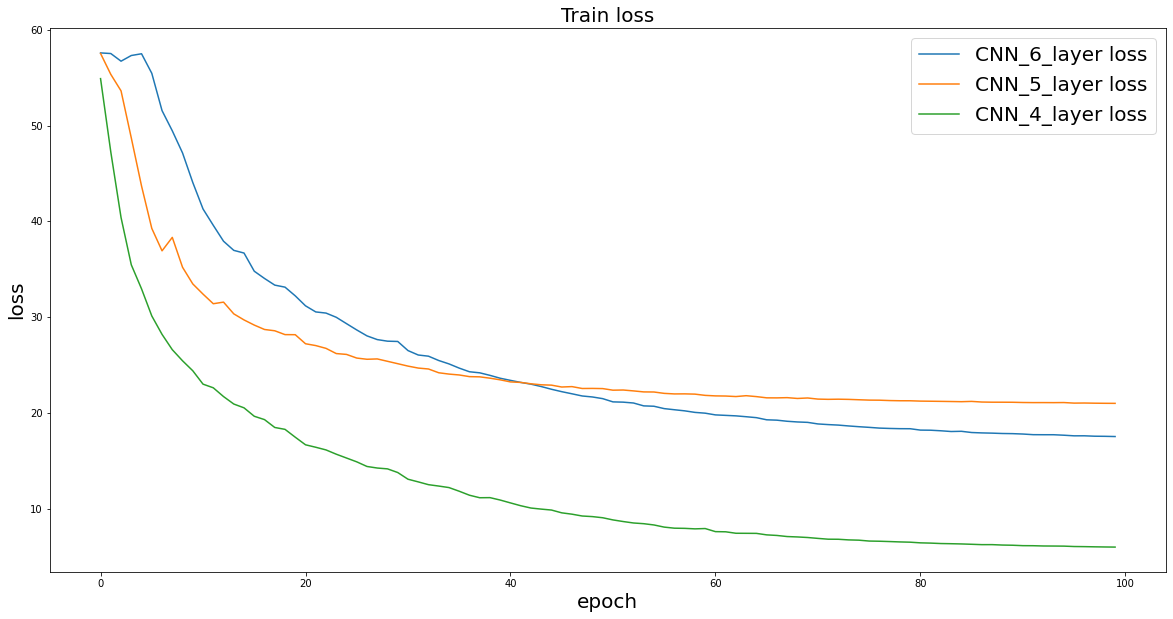

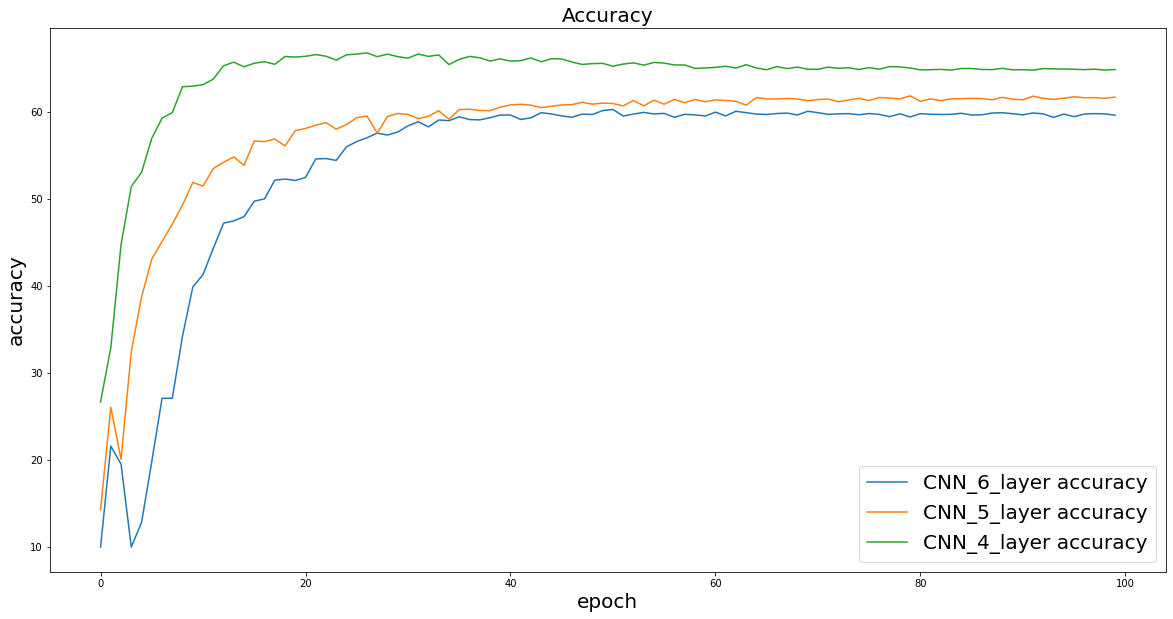

In [ ]:
####### Plot loss & accuracy #######

plt.figure(figsize=(20,10))
plt.plot(trainloss_CIFAR_6_layer, label='CNN_6_layer loss')
plt.plot(trainloss_CIFAR_5_layer, label='CNN_5_layer loss')
plt.plot(trainloss_CIFAR_4_layer, label='CNN_4_layer loss')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.title('Train loss',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img6.png')
plt.show()

##########################################

plt.figure(figsize=(20,10))
plt.plot(accuracy_CIFAR_6_layer, label='CNN_6_layer accuracy')
plt.plot(accuracy_CIFAR_5_layer, label='CNN_5_layer accuracy')
plt.plot(accuracy_CIFAR_4_layer, label='CNN_4_layer accuracy')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('accuracy',fontsize=20)
plt.title('Accuracy',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img7.png')
plt.show()

##################################################################

## DNN with MNIST

In [ ]:
###### train function ######
def train_MNIST(model_name,
                Epochs = 50,
                Batch  = 2000,
                Data_workers = 0,
                LR = 0.1):
  
    trainset = torchvision.datasets.MNIST(root='./data/',train=True,download=True,transform=transforms.ToTensor())
    testset = torchvision.datasets.MNIST(root='./data/',train=False,download=True,transform=transforms.ToTensor())
    trainloader = DataLoader(trainset, batch_size=Batch, shuffle=True, num_workers=Data_workers)
    testloader  = DataLoader(testset,  batch_size=Batch, shuffle=True, num_workers=Data_workers)
    print(trainset.classes)
    print(trainset.data.shape)
    print(testset.data.shape)

    ###### Initiate Model ######
    torch.cuda.is_available()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
    Model = model_name.to(device)

    ###### loss & optimizer ######
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(Model.parameters(), lr=LR, momentum=0.9)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.8)

    ###### Training ######
    trainloss_list = []
    testloss_list  = []
    accuracy_list  = []
    lr_list = []
   
    for epoch in range(Epochs):
        Model.train()
        train_loss = 0.0

        for i, data in enumerate(trainloader):
            images, labels = data
            images = (images.view(-1, 28*28)).to(device)
            labels = labels.to(device)
            outputs = Model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            total = (i+1)*Batch

        ###### Evaluating ######
        Model.eval()
        with torch.no_grad():
            test_loss = 0
            correct = 0
            total = 0
            for data in testloader:
                images, labels = data

                images  = (images.view(-1, 28*28)).to(device)
                labels  = labels.to(device)
                outputs = Model(images)
                loss    = criterion(outputs, labels)
                test_loss += loss.item()
                tmp, pred = torch.max(outputs.data, 1)
                correct += (pred == labels).cpu().sum()
                total += labels.size(0)
            total = len(testloader.dataset)
            accuracy = 100.0*correct/total

        ###### Save loss ######
        scheduler.step()
        lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        trainloss_list.append(train_loss)
        testloss_list.append(test_loss)
        accuracy_list.append(accuracy)
        print('{}/{} Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%) lr={}'.format(
                epoch, Epochs,test_loss, correct, total, accuracy, lr_list[-1]))

    return [trainloss_list, testloss_list, accuracy_list, lr_list]


In [ ]:
##########################################################################################################################
[trainloss_MNIST_1, testloss_MNIST_1, accuracy_MNIST_1, lr_MNIST_1] = train_MNIST(model_name=MODEL_MNIST(28*28,4,8,4,10))
##########################################################################################################################
[trainloss_MNIST_2, testloss_MNIST_2, accuracy_MNIST_2, lr_MNIST_2] = train_MNIST(model_name=MODEL_MNIST(28*28,2,4,2,10))
##########################################################################################################################
[trainloss_MNIST_3, testloss_MNIST_3, accuracy_MNIST_3, lr_MNIST_3] = train_MNIST(model_name=MODEL_MNIST(28*28,1,2,1,10))
##########################################################################################################################

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
0/50 Test set: Average loss: 6.7683, Accuracy: 5109/10000 (51.09%) lr=0.1
1/50 Test set: Average loss: 5.0829, Accuracy: 5801/10000 (58.01%) lr=0.1
2/50 Test set: Average loss: 4.4378, Accuracy: 6644/10000 (66.44%) lr=0.1
3/50 Test set: Average loss: 4.0600, Accuracy: 7313/10000 (73.13%) lr=0.1
4/50 Test set: Average loss: 3.5561, Accuracy: 7716/10000 (77.16%) lr=0.08000000000000002
5/50 Test set: Average loss: 3.3420, Accuracy: 7854/10000 (78.54%) lr=0.08000000000000002
6/50 Test set: Average loss: 3.0888, Accuracy: 8075/10000 (80.75%) lr=0.08000000000000002
7/50 Test set: Average loss: 2.8851, Accuracy: 8256/10000 (82.56%) lr=0.08000000000000002
8/50 Test set: Average loss: 3.1063, Accuracy: 7962/10000 (79.62%) lr=0.08000000000000002
9/

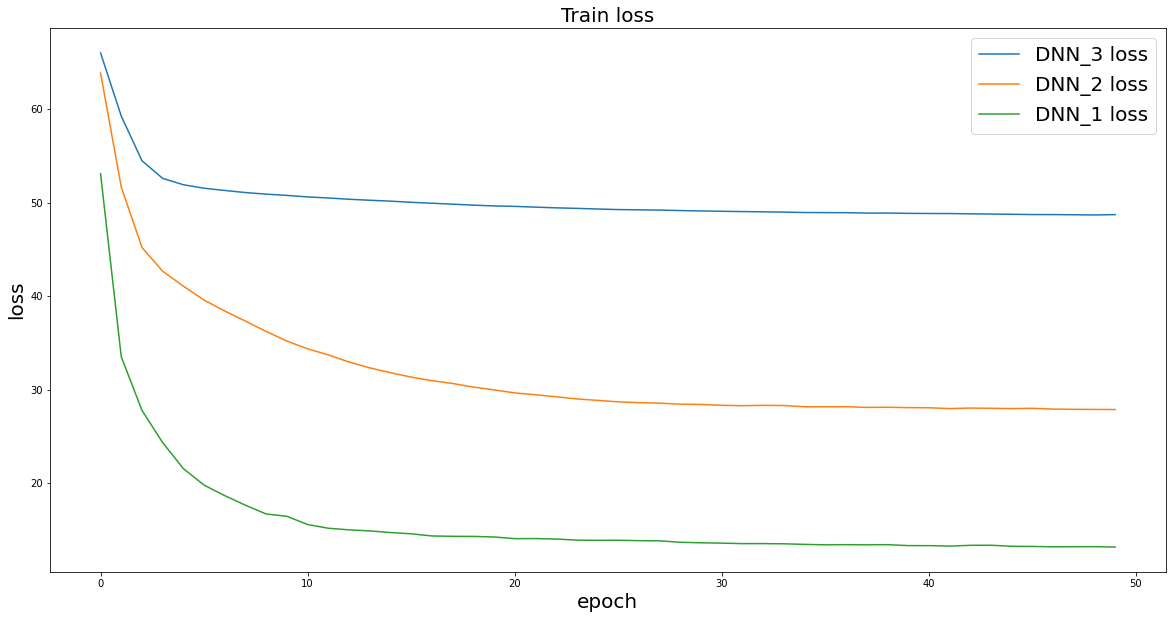

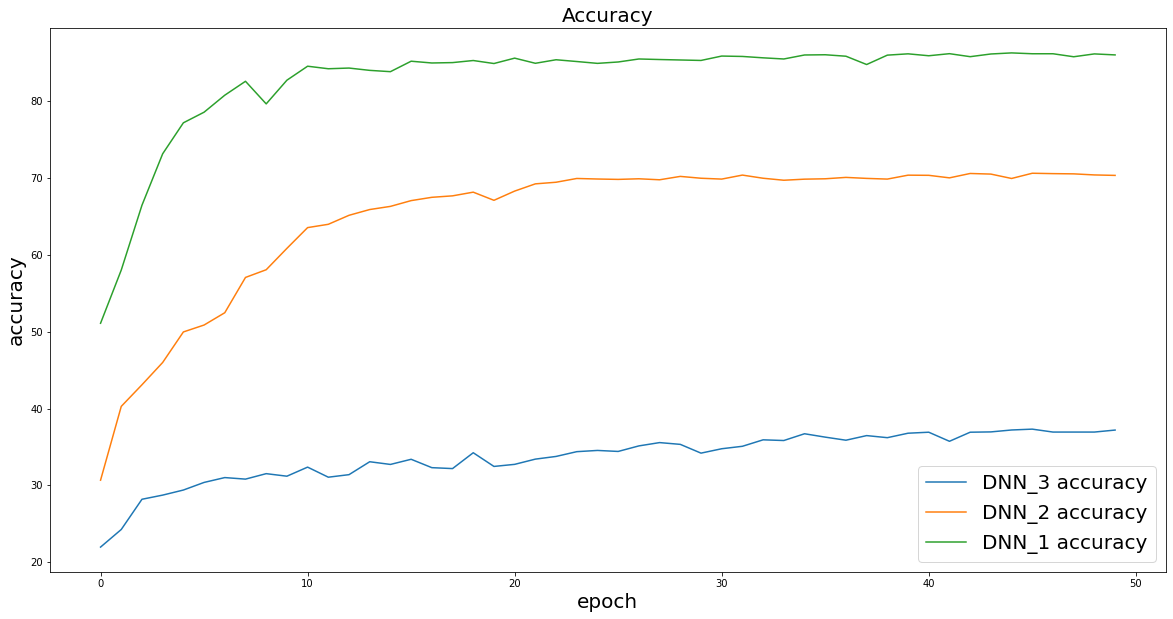

In [ ]:
############  Plot loss & accuracy ############

plt.figure(figsize=(20,10))
plt.plot(trainloss_MNIST_3, label='DNN_3 loss')
plt.plot(trainloss_MNIST_2, label='DNN_2 loss')
plt.plot(trainloss_MNIST_1, label='DNN_1 loss')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.title('Train loss',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img8.png')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(accuracy_MNIST_3, label='DNN_3 accuracy')
plt.plot(accuracy_MNIST_2, label='DNN_2 accuracy')
plt.plot(accuracy_MNIST_1, label='DNN_1 accuracy')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('accuracy',fontsize=20)
plt.title('Accuracy',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('/content/drive/MyDrive/Deep_Learning_HW1/P1/images/Part_1/img9.png')
plt.show()